# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [3]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_df = pd.read_csv(
    Path("Resources/whale_navs.csv"),
    index_col = "date",
    parse_dates = True,
    infer_datetime_format = True

) 
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [4]:
# Prepare for the analysis
"""
Will apply all changes to a copy of original dataframe for sake of backup

pct_change() will work for both NAVs and market closing price
"""
"""
dropna()
"""
# making copy of original dataframe
df = whale_df.copy()

# checking for null values before making any calculations
df.isnull().sum()

# converting the dataframe of NAVs and prices to daily returns via pct_change()
daily_returns = df.pct_change()

# dropping Na values from pct_change calc
daily_returns.dropna(inplace = True)
print("*HEAD*")
display(daily_returns.head())


*HEAD*


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily returns vs S&P 500'}, xlabel='date'>

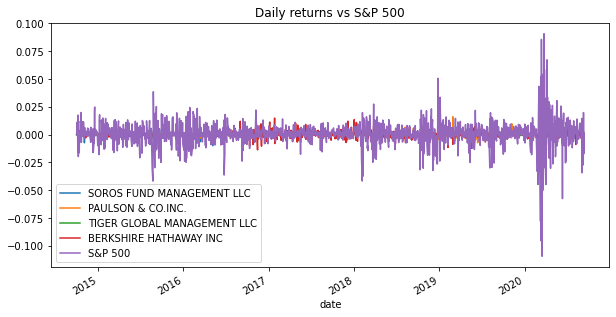

In [5]:
# Plotting the daily return data of the 4 funds and the S&P 500 
daily_returns.plot(title = "Daily returns vs S&P 500", figsize=(10,5))


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [6]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
"""
Will use following:
cumulative returns = (1 + daily_returns).cumprod() - 1

"""

cumulative_returns = (1 + daily_returns).cumprod() - 1

print("*HEAD*")
display(cumulative_returns.head())
print("*TAIL*")
display(cumulative_returns.tail())


*HEAD*


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.000609,0.000518,0.000407,0.001420,0.011165
2014-10-06,0.003066,0.000510,0.000474,0.001688,0.009982
2014-10-07,0.000437,0.000193,0.000265,0.001100,-0.005608
2014-10-08,0.000828,0.000563,0.000507,0.001943,0.011783


*TAIL*


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

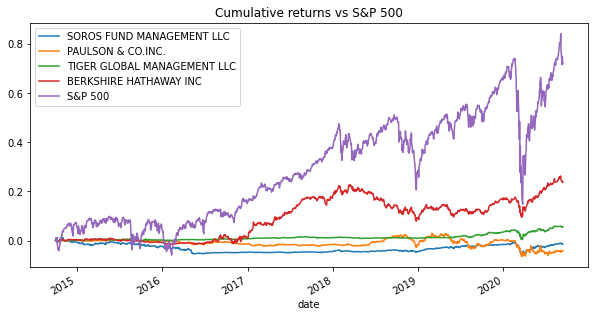

In [7]:
# Visualizing the cumulative returns using the Pandas plot function
fig_1 = cumulative_returns.plot(title = "Cumulative returns vs S&P 500", figsize=(10,5)).get_figure()
fig_1.savefig('cumulative_returns.png')

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No, none of the four funds outperform the S&P 500 over the specified time period.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

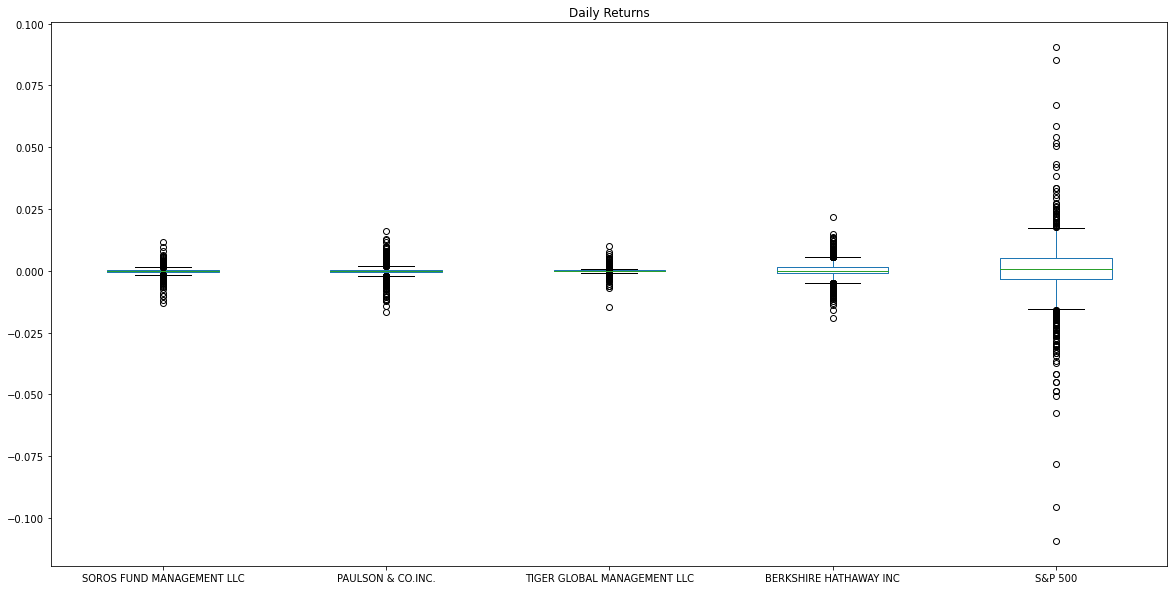

In [11]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
fig_2 = daily_returns.plot(kind="box", title="Daily Returns", figsize=(20,10)).get_figure()

fig_2.savefig('daily_returns.png')

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Daily Returns of Funds Only'}>

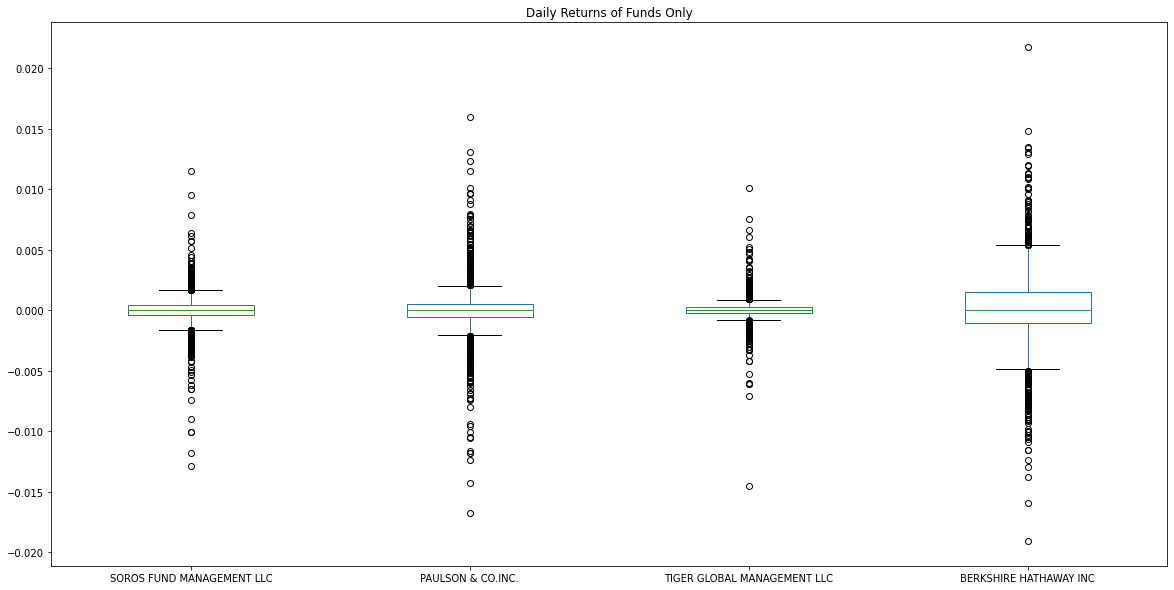

In [61]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
"""
Will create new df for funds only and 
will gauge volatility using daily returns as in previous cell
"""

fund_df = daily_returns.drop(columns="S&P 500")
display(fund_df.head())
fund_df.plot(kind="box", title="Daily Returns of Funds Only", figsize=(20,10))

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** The Berkshire Hathaway Fund had the greatest spread. Tiger Global Management LLC appears to have the smallest spread based on its total range including outliers and also has the smallest spread between its lower and upper quartiles. 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [13]:
# Calculating and sorting (small to large) the standard deviation for all 4 portfolios and the S&P 500
std_dev_all = daily_returns.std()
std_dev_all.sort_values(inplace = True)
std_dev_all.head()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [14]:
"""
Have 252 trading days
Set trading day variable for convenience
Calculate annualized std_dev
Sort ascending

"""
trading_days = 252
ann_std_dev_all = std_dev_all * (np.sqrt(trading_days))
ann_std_dev_all.sort_values(inplace = True)
ann_std_dev_all.head()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

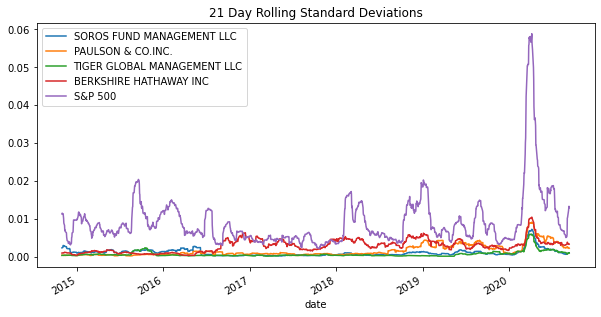

In [16]:
"""
Using daily_returns dataframe
window will be 21 for rolling()
need to calculate .std dev for specified rolling window
Plot the results
"""

roll_21_std_dev_all = daily_returns.rolling(window=21).std()
fig_3 = roll_21_std_dev_all.plot(title = "21 Day Rolling Standard Deviations", figsize=(10,5)).get_figure()

fig_3.savefig('21_Day_Rolling_STD.png')

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviations Funds Only'}, xlabel='date'>

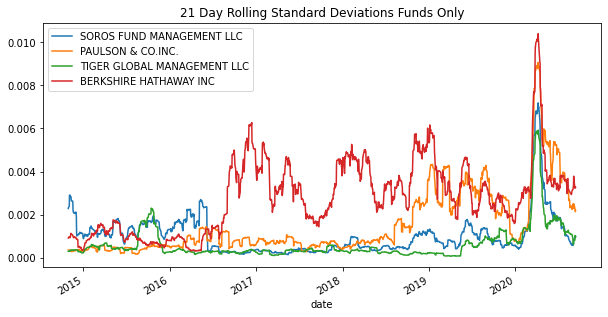

In [18]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

"""
Already have a dataframe with only fund daily return data: fund_df
Window will be 21 for rolling()
need to calculate .std dev for specified rolling window
Plot the results
"""
roll_21_std_dev_funds = fund_df.rolling(window=21).std()
roll_21_std_dev_funds.plot(title = "21 Day Rolling Standard Deviations Funds Only", figsize=(10,5))

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # Based on the annualized standard deviation, no portfolios pose more risk than the S&P 500 for any signifcant amount of time. On two instances, Berkshire Hathaway Inc had a higher rolling standard deviation relative to the S&P 500, but these instances were short-lived and don't represent any sort of trend.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Based on the rolling metrics, the risk of each portfolio seems to increase slightly as the S&P 500 increases, but all of these funds react with significantly less volatiliy than the S&P 500. Even during the spike in volatility towards the early middle of 2020, presumably from the covid crash, none of the funds came close to the volatility of the S&P 500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # 

Based on the rolling standard deviations for the four fund portfolios, the Berkshire Hathaway fund posed the highest risk over the longest period of time. 

The only time periods where the Berkshire fund was surpassed in terms of risk (assuming we are gauging risk solely off of the annualized std dev), were in the beginning and the end of the data set for brief trends that soon waned in momentum.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [19]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
"""
To calculate the annualized average daily returns,
multiply the mean for each cryptocurrency’s daily return value 
by the number of trading days.

Will use:

trading_days
daily_returns.mean()
"""
ann_avg_returns = daily_returns.mean() * trading_days
ann_avg_returns.head()

SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [20]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
"""
Annualized sharpe ratio = annualized average return / anualized standard deviation

will use:

annualized_avg_returns
ann_std_dev_all

"""

ann_sharpe_ratios = ann_avg_returns / ann_std_dev_all
ann_sharpe_ratios.sort_values(inplace = True)
ann_sharpe_ratios.head()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

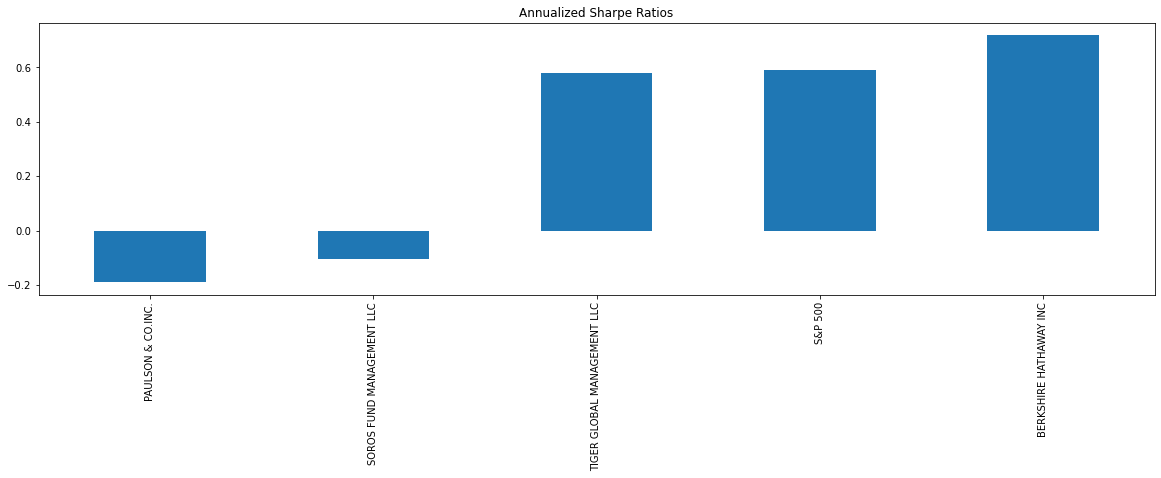

In [25]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
fig_3 = ann_sharpe_ratios.plot(kind="bar", figsize=(20,5), title="Annualized Sharpe Ratios").get_figure()
fig_3.savefig("Annualized_Sharpe_Ratios.png")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # YOUR ANSWER HERE

Berkshire Hathaway INC offers the best risk-return profile according to the above comparison. In contrast, Paulson and Co INC appears to offer the worst risk-return.

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [26]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
"""
Will use following:

daily_returns["S&P 500"] as our selected series
rolling window size of 60

goal is to create market_variance series

"""
# creating market_variance Series
market_variance_roll_60 = daily_returns["S&P 500"].rolling(window=60).var()
# #dropping null values
# market_variance_roll_60.dropna(inplace=True)
#checking head and tail of market_variance
print("head")
display(market_variance_roll_60.head())
print("tail")
display(market_variance_roll_60.tail())

head


date
2014-10-02   NaN
2014-10-03   NaN
2014-10-06   NaN
2014-10-07   NaN
2014-10-08   NaN
Name: S&P 500, dtype: float64

tail


date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [27]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
"""
Will use
tiger_daily_returns = daily_returns["TIGER GLOBAL MANAGEMENT LLC"]
berk_daily_returns = daily_returns["BERKSHIRE HATHAWAY INC"]
daily_returns["S&P 500"]

rolling window = 60

goal is to create dataframe of covariance values for chosen funds and S&P 500 over 60 day rolling window
"""
# setting variable names for two series of the funds I chose
tiger_daily_returns = daily_returns["TIGER GLOBAL MANAGEMENT LLC"]
berk_daily_returns = daily_returns["BERKSHIRE HATHAWAY INC"]

# covariance dataframes for 60 day rolling window
tiger_cov_roll_60 = tiger_daily_returns.rolling(window = 60).cov(daily_returns["S&P 500"].rolling(window =60))
berk_cov_roll_60 = berk_daily_returns.rolling(window = 60).cov(daily_returns["S&P 500"].rolling(window =60))
#reviewing tail values
print("tiger head")
display(tiger_cov_roll_60.head())
print("berkshire head")
display(berk_cov_roll_60.head())
print("tiger tail")
display(tiger_cov_roll_60.tail())
print("berkshire tail")
display(berk_cov_roll_60.tail())

tiger head


date
2014-10-02   NaN
2014-10-03   NaN
2014-10-06   NaN
2014-10-07   NaN
2014-10-08   NaN
dtype: float64

berkshire head


date
2014-10-02   NaN
2014-10-03   NaN
2014-10-06   NaN
2014-10-07   NaN
2014-10-08   NaN
dtype: float64

tiger tail


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

berkshire tail


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [28]:
print("Tiger Fund Covariance Summary")
display(tiger_cov_roll_60.describe())
print("Berkshire Fund Covariance Summary")
display(berk_cov_roll_60.describe())

Tiger Fund Covariance Summary


count    1.438000e+03
mean     7.721672e-06
std      2.327650e-05
min     -8.245290e-07
25%      5.885603e-07
50%      1.346375e-06
75%      2.783139e-06
max      1.297703e-04
dtype: float64

Berkshire Fund Covariance Summary


count    1.438000e+03
mean     2.324583e-05
std      4.114127e-05
min      5.938742e-07
25%      5.089937e-06
50%      9.677437e-06
75%      2.194672e-05
max      2.276515e-04
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [29]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
"""

will use:

market_variance
tiger fund covariance
berkshire fund covariance

beta = covariance of asset / market variance 

covariance of asset = covariance_roll_60

market variance = market_variance_roll_60

goal is to create dataframe with beta values for each fund

"""
# calculating betas for Tiger and Berkshire funds and creating new Series
tiger_beta_roll_60 = tiger_cov_roll_60 / market_variance_roll_60
berk_beta_roll_60 = berk_cov_roll_60 / market_variance_roll_60
print("Tiger Fund Tail")
display(tiger_beta_roll_60.tail())
print("Berkshire Fund Tail")
display(berk_beta_roll_60.tail())

Tiger Fund Tail


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

Berkshire Fund Tail


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [30]:
"""
Before going further, 
I am going to drop all of the 60 null values generated from rolling method use
"""
# checking for NaN values
tiger_beta_roll_60.isna().sum()
berk_beta_roll_60.isna().sum()

# removing NaN values
tiger_beta_roll_60.dropna(inplace = True)
berk_beta_roll_60.dropna(inplace = True)

# checking change applied
display(tiger_beta_roll_60.isna().sum())
display(berk_beta_roll_60.isna().sum())

0

0

In [31]:
# Calculate the average of the 60-day rolling beta
"""
will take average of rolling beta by taking the mean of rolling beta

Will apply to both of the funds I chose: Tiger and Berkshire

goal = find the averages of 60 day rolling beta values for Tiger and Berkshire funds
"""

# calculating averages
print("(Tiger) Mean for Rolling 60 Day Beta")
display(tiger_beta_roll_60.mean())
print("(Berkshire) Mean for Rolling 60 Day Beta")
display(berk_beta_roll_60.mean())

(Tiger) Mean for Rolling 60 Day Beta


0.03093001487238774

(Berkshire) Mean for Rolling 60 Day Beta


0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

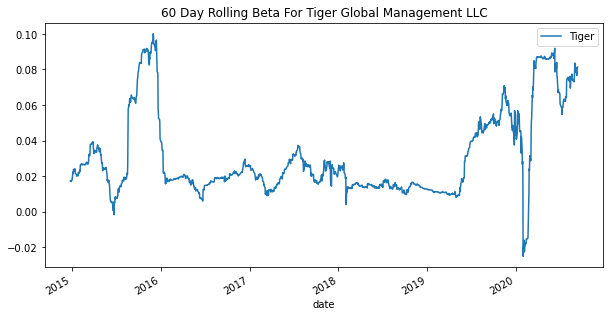

In [39]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
fig_5 = tiger_beta_roll_60.plot(title="60 Day Rolling Beta For Tiger Global Management LLC", legend = True,label = "Tiger", figsize = (10,5)).get_figure()
fig_5.savefig("60Day_Rolling_Beta_Tiger_Global.png")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [40]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE

"""
Already completed above
Didn't delete section in case format is needed for grading
"""


"\nAlready completed above\nDidn't delete section in case format is needed for grading\n"

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [41]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE

"""
Already completed above
Didn't delete section in case format is needed for grading
"""

"\nAlready completed above\nDidn't delete section in case format is needed for grading\n"

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [42]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE

"""
Already completed 
Didn't delete section in case format is needed for grading
"""

"\nAlready completed \nDidn't delete section in case format is needed for grading\n"

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

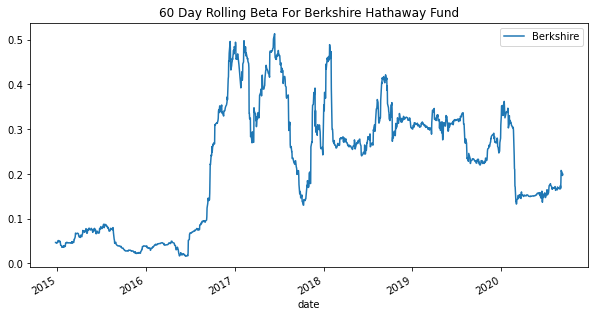

In [45]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

fig_6 = berk_beta_roll_60.plot(title="60 Day Rolling Beta For Berkshire Hathaway Fund", legend = True,label = "Berkshire", figsize = (10,5)).get_figure()
fig_6.savefig("60Day_Rolling_Beta_Berkshire.png")

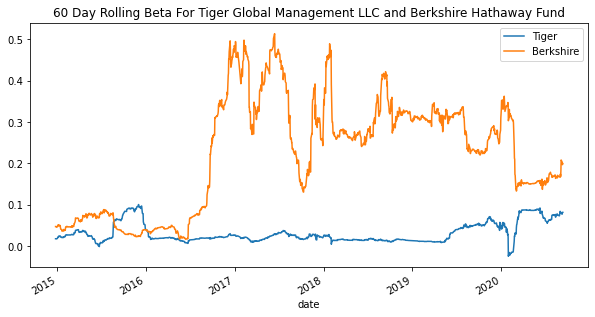

In [60]:
"""
Creating Overlay plot of both rolling betas to compare over entire data frame
"""

ax = tiger_beta_roll_60.plot(legend=True, title="60 Day Rolling Beta For Tiger Global Management LLC and Berkshire Hathaway Fund", figsize = (10,5), label = "Tiger")
berk_beta_roll_60.plot(ax=ax, legend = "Berkshire", label = "Berkshire")
ax.legend = (["Tiger", "Berkshire"])


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** The Bekrshire Hathaway Fund seems more sensitive to price momvements in the S&P 500, as can be seen by assessing the value of its 60 day rolling beta over the past 5 years. Although the beta value for the Berkshire Fund has fluctuated significantly within the period of anlysis, it has almost always had a higher beta value than the Tiger Management fund, and subsequently would be more sensitive to movements in the broader market (as in the S&P 500).


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** 
    I would recommend the Tiger Management LLC portfolio for inclusion in my firm's suite of fund offerings for the following reasons: The Tiger LLC portfolio offers a competitive sharpe ratio value, representing a good return on assumed risk, compared with the other three funds, but it also remains less sensitive to market movements than funds that otherwise perform similarly in terms of return on risk. The Tiger Management LLC fund has a solid track record of maintaining a low positive beta value, meaning it won't react to market movements as much as some of the other funds with more extreme beta value trends. 
    Given that my company wishes to offer funds that assist clients in planning for retirement, the Tiger fund seems like the logical choice as it possesses a conservative risk profile while still providing growth near the rate of the broader market.


---